In [1]:
import pandas as pd
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Index

1. Data cleaning

2. Data modelling

> 2.1 Data pre-processing

> 2.2 Data training

> 2.3 Hyperparameter Tuning

> 2.4 Random Forest prediction

> 2.5 Final model

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.describe(include='all')

,Airline,Source,Destination,Duration,Total stops,Price,Date
count,2307,2307,2307,2307.000000,2307.000000,2307.00000,2307
unique,75,4,4,NaN,NaN,NaN,24
top,Iberia,DUB,DUB,NaN,NaN,NaN,2023-12-23
freq,418,1162,1145,NaN,NaN,NaN,109
mean,NaN,NaN,NaN,462.697443,0.926745,247.95622,NaN
std,NaN,NaN,NaN,273.720522,0.640028,153.71810,NaN
min,NaN,NaN,NaN,150.000000,0.000000,27.00000,NaN
25%,NaN,NaN,NaN,300.000000,1.000000,137.00000,NaN
50%,NaN,NaN,NaN,420.000000,1.000000,210.00000,NaN
75%,NaN,NaN,NaN,580.000000,1.000000,325.00000,NaN


In [4]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total stops    0
Price          0
Date           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      2307 non-null   object
 1   Source       2307 non-null   object
 2   Destination  2307 non-null   object
 3   Duration     2307 non-null   int64 
 4   Total stops  2307 non-null   int64 
 5   Price        2307 non-null   int64 
 6   Date         2307 non-null   object
dtypes: int64(3), object(4)
memory usage: 126.3+ KB


## 1. Data cleaning

'price' column conversion from Indian Rupees to €

In [6]:
exchange_rate = 0.011
# Create a new column for converted prices in Euro
df['price_euro'] = df['Price'] * exchange_rate

In [7]:
df["Airline"] = df["Airline"].astype("category")
df["Source"] = df["Source"].astype("category")
df["Destination"] = df["Destination"].astype("category")
df["Date"] = df["Date"].astype("category")

lab_enc = LabelEncoder()

df["Airline"] = lab_enc.fit_transform(df["Airline"])
df["Source"] = lab_enc.fit_transform(df["Source"])
df["Destination"] = lab_enc.fit_transform(df["Destination"])
df["Date"] = lab_enc.fit_transform(df["Date"])

## 2. Modeling testing

In [8]:
X = df.drop(["price_euro"], axis=1)
y = df["price_euro"]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Airline      2307 non-null   int32
 1   Source       2307 non-null   int32
 2   Destination  2307 non-null   int32
 3   Duration     2307 non-null   int64
 4   Total stops  2307 non-null   int64
 5   Price        2307 non-null   int64
 6   Date         2307 non-null   int32
dtypes: int32(4), int64(3)
memory usage: 90.2 KB


### 2.1 Data pre-processing

In [10]:
min_max_scl = MinMaxScaler()
X_scl = min_max_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = df.columns[0:7])

In [11]:
df = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df

,Airline,Source,Destination,Duration,Total stops,Price,Date,price_euro
0,0.445946,0.0,0.333333,0.056391,0.333333,0.445428,0.521739,5.280
1,0.013514,0.0,0.333333,0.635338,0.666667,0.251721,0.521739,3.113
2,0.351351,0.0,0.333333,0.056391,0.333333,0.509341,0.521739,5.995
3,0.837838,0.0,0.333333,0.107143,0.333333,0.423795,0.521739,5.038
4,0.135135,0.0,0.333333,0.071429,0.333333,0.431662,0.521739,5.126
...,...,...,...,...,...,...,...,...
2302,0.189189,1.0,0.000000,0.195489,0.333333,0.073746,0.478261,1.122
2303,0.459459,1.0,0.000000,0.129699,0.333333,0.122911,0.478261,1.672
2304,0.581081,1.0,0.000000,0.129699,0.333333,0.127827,0.478261,1.727
2305,0.837838,1.0,0.000000,0.129699,0.333333,0.171091,0.478261,2.211


### 2.2 Data modelling

- Training splits 80-20%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.2)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2307, 7), (2307,), (1845, 7), (462, 7), (1845,), (462,))

In [13]:
regression_models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
    ('Support Vector Regressor', SVR()),
    ('K-Nearest Neighbours Regressor', KNeighborsRegressor())]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Linear Regression: 0.000000 (0.000000)
Ridge Regression: 0.002256 (0.000233)
Lasso Regression: 2.857997 (0.200069)
Decision Tree Regressor: 0.001346 (0.001349)
Random Forest Regressor: 0.000341 (0.000462)
Support Vector Regressor: 0.027487 (0.011548)
K-Nearest Neighbours Regressor: 0.227604 (0.033441)
+--------------------------------+-----------------------------+----------------------------+
| Model                          |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+================================+=============================+============================+
| Linear Regression              |                 2.91837e-29 |                8.17366e-29 |
+--------------------------------+-----------------------------+----------------------------+
| Ridge Regression               |                 0.00225568  |                0.00023264  |
+--------------------------------+-----------------------------+----------------------------+
| Lasso Regression               |     

In [14]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []


for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
   
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Linear Regression on the test set...
Evaluating Ridge Regression on the test set...
Evaluating Lasso Regression on the test set...
Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
Evaluating Support Vector Regressor on the test set...
Evaluating K-Nearest Neighbours Regressor on the test set...
+--------------------------------+---------------+----------------------+-------------+-----------------------+
| Model                          |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+================================+===============+======================+=============+=======================+
| Linear Regression              |      1        |          1.12628e-30 |  1          |           8.37113e-16 |
+--------------------------------+---------------+----------------------+-------------+-----------------------+
| Ridge Regression               |      0.999363 |          0.00197568  | 

### Note
Splitting the dataset 80% training and 20% we already can see the algorithms with a better predicction performance are Decision Tree and Random Forest, so that it is been decided to carry on with the analysis just using this algorithms.

- Training splits 90-10%

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.1)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2307, 7), (2307,), (2076, 7), (231, 7), (2076,), (231,))

In [16]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 0.000925 (0.001870)
Random Forest Regressor: 0.000272 (0.000277)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                 0.000924706 |                0.00186976  |
+-------------------------+-----------------------------+----------------------------+
| Random Forest Regressor |                 0.000271994 |                0.000276705 |
+-------------------------+-----------------------------+----------------------------+


In [17]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |      1        |          9.16667e-05 |    0.999961 |            0.00233333 |
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Random Forest Regressor |      0.999989 |          3.51575e-05 |    0.999985 |            0.00188994 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


- Training splits 70-30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.3)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2307, 7), (2307,), (1614, 7), (693, 7), (1614,), (693,))

In [19]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=500, max_depth=10)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 0.000699 (0.000795)
Random Forest Regressor: 0.000577 (0.000820)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                 0.000699358 |                0.000794514 |
+-------------------------+-----------------------------+----------------------------+
| Random Forest Regressor |                 0.000576899 |                0.000820136 |
+-------------------------+-----------------------------+----------------------------+


In [20]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    return [train_score, mse, r2, mae]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    metrics = get_metrics(model, X_test, y_test)
    
    results.append([name] + metrics)

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |      1        |           0.00137814 |    0.999561 |            0.00709524 |
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Random Forest Regressor |      0.999988 |           0.00133213 |    0.999576 |            0.0063442  |
+-------------------------+---------------+----------------------+-------------+-----------------------+


As evidenced, optimal results are achieved by utilising random forest and decision tree methods in combination with a 70-30% data split. Therefore, we have decided to select them for further examination to ascertain if improvements can be made to achieve even more accurate predictions.
### Best performance
- Random forest
- Decision tree
- Splitting 70-30%

### Note 
The algorithm we have obtained the best performances are decision tree and random forest and, although the Decision Tree Regressor shows a high R-squared score on the training set, the test set also demonstrates a reasonably high score, indicating some level of generalisation.
On the other hand, the Random Forest Regressor performs slightly better on the test set with a lower training R-squared score, suggesting better generalisation compared to the Decision Tree Regressor.
Therefore, we could attempt to perform hyperparameter tuning to enhance the efficacy of both models, especially the one generated from the random forest algorithm.

### 2.3 Hyperparameter Tuning

In [21]:
# Decision Tree hyperparameter tuning
dt_param_grid = {
   'max_depth': [None, 10, 20, 30, 40, 50],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['auto', 'sqrt', 'log2']
}

dt_model = DecisionTreeRegressor()
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree Score:", dt_grid_search.best_score_)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
# print("Best Random Forest Score:", rf_grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\eduma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\eduma\anaconda3\lib\site-packag

Best Decision Tree Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Score: -0.10235464457242852
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\eduma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\eduma\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\eduma\anaconda3\lib\site-packa

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### Note
The negative mean squared error serves as a frequently used metric for optimizing grid search. The closer the score approximates 0 (or the more negative it is), the greater the model's performance. 

### Decision Tree hyperparameters tuned
Best Parameters:

max_depth: None

max_features: 'log2'

min_samples_leaf: 1

min_samples_split: 2

Best Score: -0.14567592255254502 (negative mean squared error)

### Random Forest hyperparameters tuned
Best Parameters:

max_depth: 30

max_features: 'log2'

min_samples_leaf: 1

min_samples_split: 2

n_estimators: 300

- Decision Tree hyperparameter tuned

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.3)

regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Decision Tree Regressor: 0.198199 (0.176582)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Decision Tree Regressor |                    0.198199 |                   0.176582 |
+-------------------------+-----------------------------+----------------------------+


In [23]:
regression_models = [
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2)),
]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)
    
    results.append([name, train_score, mse, r2, mae])

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Decision Tree Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Decision Tree Regressor |             1 |             0.279652 |    0.897606 |              0.254873 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


- Random Forest hyperparameter tuned.

In [24]:
regression_models = [
    ('Random Forest Regressor', RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
]

results = []
names = []

for name, model in regression_models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append([-cv_results.mean(), cv_results.std()])
    names.append(name)
    print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

headers = ["Model", "Mean Squared Error (mean)", "Mean Squared Error (std)"]

print(tabulate(zip(names, *zip(*results)), headers=headers, tablefmt="grid"))

Random Forest Regressor: 0.033867 (0.021985)
+-------------------------+-----------------------------+----------------------------+
| Model                   |   Mean Squared Error (mean) |   Mean Squared Error (std) |
+=========================+=============================+============================+
| Random Forest Regressor |                   0.0338665 |                  0.0219847 |
+-------------------------+-----------------------------+----------------------------+


Based on the outcomes of hyperparameter tuning, the Random Forest model had a superior performance against the Decision Tree model, achieving a more negative score in terms of mean squared error and a lower result that is closer to 0. Using Random Forest also mitigates the effect of outliers in our data, thus making our predictions more reliable.

### 2.4. Random Forest prediction

Once we have decided which algorithm we are using we are performing some visualizations in order to visualy analyse their performance.
We are deciding to visualise Random Forest prediction.

In [25]:
regression_models = [
    ('Random Forest Regressor', RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
]

results = []

for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    train_score = model.score(X_train, y_train)

    results.append([name, train_score, mse, r2, mae])

headers = ["Model", "Train Score", "Mean Squared Error", "R-squared", "Mean Absolute Error"]

print(tabulate(results, headers=headers, tablefmt="grid"))

Evaluating Random Forest Regressor on the test set...
+-------------------------+---------------+----------------------+-------------+-----------------------+
| Model                   |   Train Score |   Mean Squared Error |   R-squared |   Mean Absolute Error |
+=========================+===============+======================+=============+=======================+
| Random Forest Regressor |      0.998445 |            0.0272828 |    0.990011 |             0.0938342 |
+-------------------------+---------------+----------------------+-------------+-----------------------+


Evaluating Random Forest Regressor on the test set...
Train score 0.9984969477117991


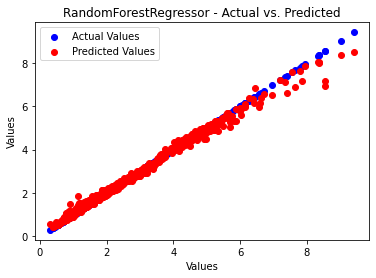

In [26]:
def plot_actual_vs_predicted(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    plt.scatter(y_test, y_test, color='blue', label='Actual Values')
    
    plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
    
    plt.xlabel("Values")
    plt.ylabel("Values")
    plt.title(f"{type(model).__name__} - Actual vs. Predicted")
    plt.legend()
    plt.show()


for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    model.fit(X_train, y_train)

    get_metrics(model, X_test, y_test)
    print(f'Train score {model.score(X_train, y_train)}')

    plot_actual_vs_predicted(model, X_test, y_test)

    print("\n")

Evaluating Random Forest Regressor on the test set...


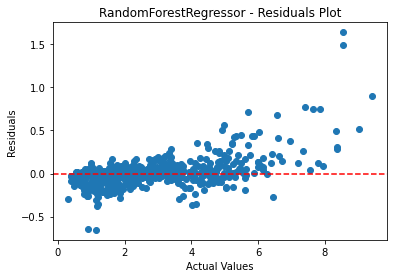

In [27]:
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.title(f"{type(model).__name__} - Residuals Plot")
    plt.show()

# Iterate through the regression models
for name, model in regression_models:
    print(f"Evaluating {name} on the test set...")

    # Train the model
    model.fit(X_train, y_train)

    # Get and print the model's performance metrics on the test set
    get_metrics(model, X_test, y_test)

    plot_residuals(model, X_test, y_test)

    # Add any additional analysis or output as needed
    print("\n")

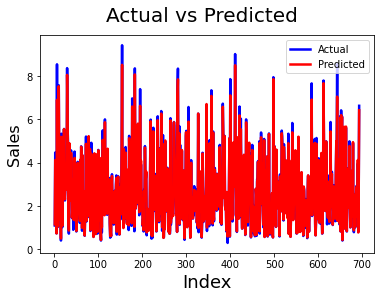

In [28]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
def plot_actual_vs_predicted(actual_values, predicted_values, title='Actual and Predicted', x_label='Index', y_label='Sales'):
    c = [i for i in range(1, len(actual_values) + 1)]  # generating index 
    fig = plt.figure()
    plt.plot(c, actual_values, color="blue", linewidth=2.5, linestyle="-", label='Actual')
    plt.plot(c, predicted_values, color="red", linewidth=2.5, linestyle="-", label='Predicted')
    fig.suptitle(title, fontsize=20)  # Plot heading 
    plt.xlabel(x_label, fontsize=18)  # X-label
    plt.ylabel(y_label, fontsize=16)  # Y-label
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted', x_label='Index', y_label='Sales')

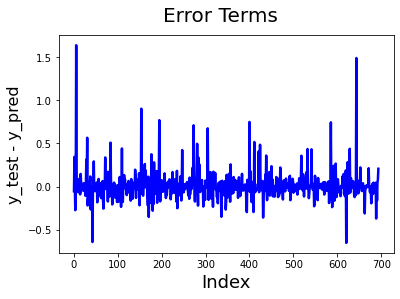

In [29]:
def plot_error_terms(error_terms, title='Error Terms', x_label='Index', y_label='y_test - y_pred'):
    c = [i for i in range(1, len(error_terms) + 1)]  # generating index 
    fig = plt.figure()
    plt.plot(c, error_terms, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle(title, fontsize=20)  # Plot heading 
    plt.xlabel(x_label, fontsize=18)  # X-label
    plt.ylabel(y_label, fontsize=16)  # Y-label
    plt.show()

# Assuming you have error_terms (y_test - y_pred) from your regression model
# You can call the function like this:
plot_error_terms(y_test - y_pred, title='Error Terms', x_label='Index', y_label='y_test - y_pred')

#### 2.5 Final model

In [30]:
rf = RandomForestRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=300)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

test_df = pd.DataFrame({
    "Predicted Price": predictions,
    "Actual Price": y_test,
}).reset_index(drop=True)

test_df.head(15)

,Predicted Price,Actual Price
0,1.205120,1.100
1,4.171052,4.466
2,1.155032,1.133
3,1.454112,1.188
4,0.721773,0.737
5,6.860470,8.536
6,1.969886,1.958
7,1.067771,1.034
8,5.424515,5.269
9,7.577231,7.568


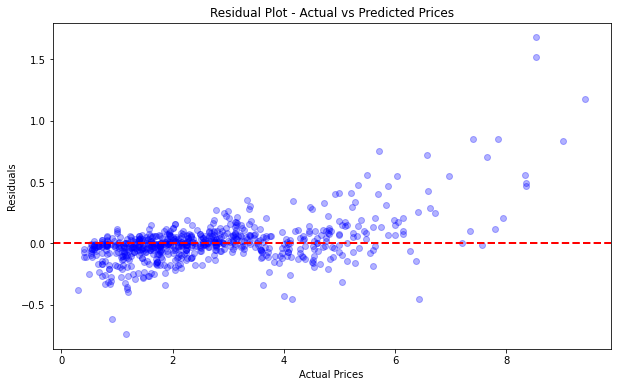

In [31]:
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot - Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

In [32]:
mean_difference = np.mean(predictions - y_test)

print(f"Mean Difference between Actual and Predicted Prices: {round(mean_difference*100,2)}")

Mean Difference between Actual and Predicted Prices: -0.62
